# Aprendizado de máquinas
- Vamos usar o dataset iris, bastante conhecido pra quem já trabalha com Machine Learning
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [1]:
# Importando as bibliotecas (pandas, matplotlib, numpy)

In [2]:
# Importando o dataset iris

In [3]:
# Obtendo os dados do dataset

In [4]:
# Valores de X

In [5]:
# Valores de Y

**Podemos transformar essa base em um DataFrame para conseguir trabalhar melhor com os dados**

In [6]:
# Transformando em um DataFrame

**O que são as colunas 0, 1, 2, 3? No próprio dataset existe o `feature_names` que podemos usar para atribuir nome as colunas**

In [7]:
# Nome das colunas

**Também podemos adicionar a coluna `Target` com a classificação de cada linha**

In [8]:
# Adicionando a coluna targer ao DataFrame

**Nesse exemplo, para começarmos a trabalhar com Machine Learning, vamos considerar apenas o Target = 0 e Target = 1**

In [9]:
# Contando a quantidade de cada um dos Targets

In [10]:
# Retirando Target = 2

In [11]:
# Contando novamente os valores

# Criando uma função para separar esses dados

**Vamos começar visualizando esses dados 2 a 2**
- Podemos usar o `.plotting.scatter_matrix()` do pandas para gerar essa visualização

**Porém também podemos usar o seaborn para tornar o visual mais amigável**
- Do seaborn, podemos usar o `.pairplot()`
    - Usando o parâmetro `hue` podemos escolher qual coluna vai definir a cor dos nossos dados

**Conseguimos facilmente traçar uma reta que separaria petal lenght de petal width**<br><br>
**Antes disso, vamos plotar um gráfico com essas informações**

In [12]:
# Traçando um scatter do matplotlib das colunas "petal length (cm)" e "petal width (cm)"

**Para melhorar a visualização, podemos usar o colormap**
- https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
    - `cmap='PiYG'`

In [13]:
# Traçando um scatter do matplotlib das colunas "petal length (cm)" e "petal width (cm)"

# Podemos traçar uma reta capaz de separar esses dados

**Vamos traçar qualquer reta que irá conseguir separar os 2 dados**

In [14]:
# Traçando o scatter plot e a reta

## <font color="blue">Essa é a melhor reta que separa esses dados?</font>
- <font color="red"> **Provavelmente não, mas ela consegue resolver o nosso problema** </font>

**Porém podemos traçar outras retas que também conseguem fazer isso**

In [15]:
# Buscando por melhores retas

**Qualquer uma das retas serviria para o nosso modelo já que elas separam os dados (lembre-se que na maioria dos casos não vamos estar falando de apenas 2 dimensões)**
<br><br>
**Podemos escolher a <font color="red"> vermelha </font> pelo fato dela não estar nem muito próxima ao 0 nem muito próxima ao 1**

**Essa reta é dada pela equação abaixo:**<br>
**<font color="red"> y = -x + 3** </font>

**Para determinar em qual região qualquer ponto vai estar, basta substituirmos o x do ponto na equação acima e verificar:**<br><br>
- Se y do ponto > y da equação, esse ponto vai ser classificado como 1
- Se y do ponto < y da equação, esse ponto vai ser classificado como 0

**Ex: (3.5,0.7)**
- y da equação = -x + 3 = -3.5 + 3 = -0.5
- y do ponto = 0.7
<br><br>
- Nesse caso: **`y do ponto > y da equação`** -> **Target = 1**

**Para visualizar, podemos traçar esse ponto no gráfico acima**

In [16]:
# Traçando novamente a reta e adicionando o ponto que acima

# Criando um modelo de Machine Learning para classificar meus pontos

### Vamos usar o Perceptron para descobrir a melhor reta que separa esses pontos
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

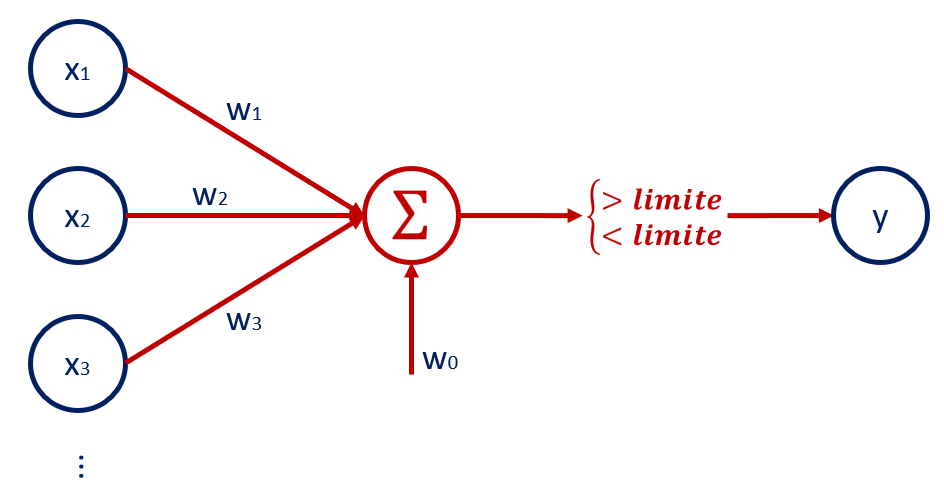

In [22]:
# Importando o perceptron e fazendo o fit

#### Usando para os nossos dados

In [23]:
# Selecionando o X e o y

In [24]:
# Fazendo o fit com o modelo

In [25]:
# w1 e w2

In [26]:
# w0

In [27]:
# Colocando tanto o perceptron quanto a reta que traçamos no gráfico

**Adicionando uma nova base com os dados mostrados abaixo**
- Esses dados foram criados por nós e servem apenas para mostrar o que aconteceria no caso da adição de novos dados ao modelo

In [207]:
# Adicionando uma nova base com os dados mostrados abaixo
base2 = pd.DataFrame([[0,0,3,0.75,0], [0,0,2.5,1,0]])
base2.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','Target']

In [208]:
base2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,0,0,3.0,0.75,0
1,0,0,2.5,1.00,0


In [209]:
# Adicionado esses dados ao dataset iris
iris = iris.append(base2)

In [211]:
# Executando o Perceptron pra essa nova base
X = iris[["petal length (cm)","petal width (cm)"]]
y = iris.Target

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

Perceptron()

**Traçando novamente o gráfico com o perceptron e a nossa reta para os novos dados**

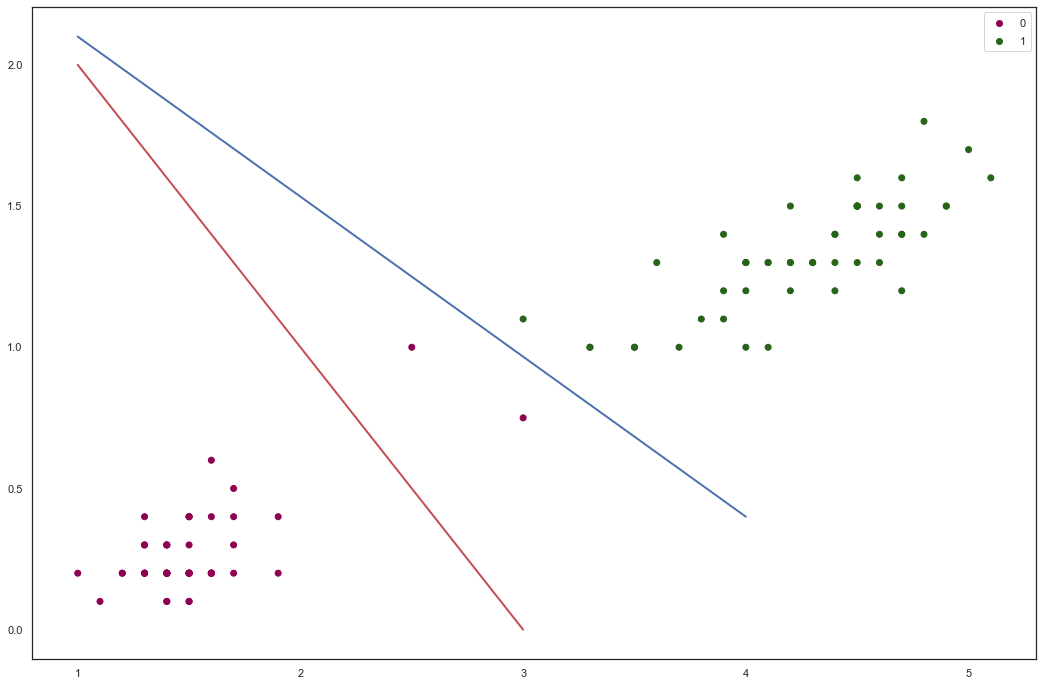

In [213]:
fig, ax = plt.subplots()

scatter_plot = ax.scatter(iris["petal length (cm)"],iris["petal width (cm)"],c=iris.Target, cmap='PiYG')

ax.legend(handles=scatter_plot.legend_elements()[0], labels=scatter_plot.legend_elements()[1])

# Traçando novamente a reta gerada pelo perceptron
x_perc = np.arange(1,5)
y_perc = -((clf.intercept_[0])/(clf.coef_[0][1]))-((clf.coef_[0][0])/(clf.coef_[0][1]))*x_perc
ax.plot(x_perc,y_perc,c="b",linewidth=2.0)

# E a reta do nosso modelo
x2 = [1,3]
y2 = [2,0]
ax.plot(x2,y2,c="r",linewidth=2.0)

plt.show()

**Observe que agora para os novos dados o perceptron consegue se ajustar e traçar uma nova reta, continuando classificando todos os pontos de forma correta. 
Já na nossa reta traçada inicialmente, esses dois novos pontos seriam classificados de forma errada.**